In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from numpy import log,dot,e,shape

In [ ]:
df=pd.read_csv('/content/Iris (1).csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cl=LogisticRegression(multi_class='auto')
X=df.drop(['Species'],axis=1)
y=df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
cl.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='auto')

In [ ]:
y_pred = cl.predict(X_test)
print(f"testing accuracy {accuracy_score(y_test, y_pred)}")
y_pred_train = cl.predict(X_train)
print(f"training accuracy {accuracy_score(y_train, y_pred_train)}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 5 features as input.

y_pred_train = cl.predict(X_train)
accuracy_score(y_train, y_pred_train)

In [ ]:
y_pred_train = cl.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]])

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

In [ ]:
class LogisticRegression:
  def sigmoid(self,z):
        sig = 1/(1+e**(-z))
        return sig
  def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
  def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
  def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):

            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision)

    return f1_score
standardize(X_tr)
standardize(X_te)
obj1 = LogisticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)
f1_score_tr = f1_score(y_tr,y_train)
f1_score_te = f1_score(y_te,y_pred)
print(f" Training:{f1_score_tr}")
print(f" Training:{f1_score_te}")

 Training:1.8095238095238093
 Training:1.0


<ipython-input-11-2b3b8e4c0dbf>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


Hyper parameter Tuning


In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(0, 5):
   lr = LogisticRegression(C=10**c, random_state=0)
   lr.fit(X_train_std, y_train)
   weights.append(lr.coef_[1])
   params.append(10**c)

weights = np.array(weights)

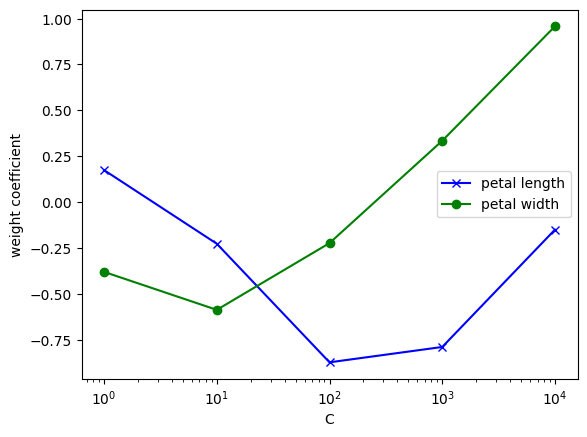

In [ ]:
plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green',  marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

diff = weights[:, 0] - weights[:, 1]
intersection=params[np.argmin(np.abs(diff))]


In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f"Testing accuracy after regularization :{accuracy_score(y_test, y_pred)}")


Training accuracy after regularization :0.9777777777777777


In [ ]:
y_pred_tr=lr.predict(X_train)
print(f"Training accuracy after regularization :{accuracy_score(y_train, y_pred_tr)}")

Training accuracy after regularization :0.9619047619047619


In [ ]:
f1_score_tr = f1_score(y_tr,y_train)
f1_score_te = f1_score(y_te,y_pred)
print(f" Training F1 score:{f1_score_tr}")
print(f" Testing F1 score:{f1_score_te}")

 Training F1 score:0.6086956521739131
 Testing F1 score:1.2
